In [ ]:
import numpy as np # linear algebra
import pandas as pd
!pip install opendatasets --upgrade --quiet

import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection'
od.download(download_url)


df= pd.read_csv('./online-payment-fraud-detection/onlinefraud.csv')

Skipping, found downloaded files in "./online-payment-fraud-detection" (use force=True to force download)


In [ ]:
# Exibir informações sobre o dataframe para verificar tipos de dados e valores ausentes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [ ]:
# Verificar estatísticas básicas para entender a distribuição dos dados
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [ ]:
# selecionar campo isFlaggedFraud como 1
import pandas as pd
#Importar arquivo CSV

df[df["isFraud"] == 1]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
# Valida se há campos nulos a serem tratados

df.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df[df["isFraud"] == 1]["step"].value_counts()

,count
step,
212,40
523,30
387,28
425,28
249,28
...,...
202,2
589,2
112,2


In [ ]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


Melhores características selecionadas:
['step' 'amount' 'oldbalanceOrg' 'newbalanceOrig' 'type_CASH_OUT'
 'type_PAYMENT' 'type_TRANSFER']
Árvore de Decisão
Acurácia: 0.9996086517818131
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.86      0.83      0.84      1620

    accuracy                           1.00   1272524
   macro avg       0.93      0.92      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



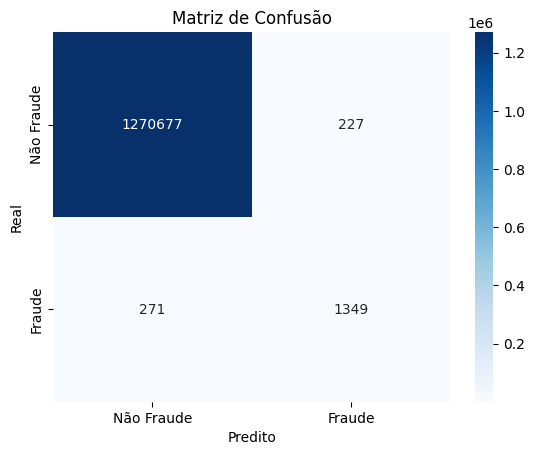

Regressão Logística
Acurácia: 0.9991599372585507
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.38      0.54      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



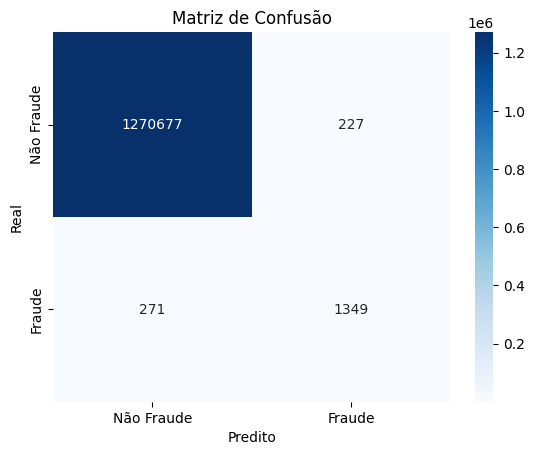

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:40:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Acurácia: 0.9996809490430043
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.84      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.92      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Codificar variáveis categóricas
df = pd.get_dummies(df, columns=['type'], drop_first=True)


X = df.drop(['nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# Normaliza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide os dados em de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Seleciona as melhores características
k = 7
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Obter as colunas selecionadas
selected_features = np.array(X.columns)[selector.get_support()]

print("Melhores características selecionadas:")
print(selected_features)

# Árvore de Decisão
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train_selected, y_train)
y_pred_tree = clf_tree.predict(X_test_selected)
print("Árvore de Decisão")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_tree))

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Regressão Logística
clf_logreg = LogisticRegression(max_iter=1000, random_state=42)
clf_logreg.fit(X_train_selected, y_train)
y_pred_logreg = clf_logreg.predict(X_test_selected)
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_logreg))

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# XGBoost
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf_xgb.fit(X_train_selected, y_train)
y_pred_xgb = clf_xgb.predict(X_test_selected)
print("XGBoost")
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb))

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# 2. Codificar variáveis categóricas
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# 3. Separar características e alvo
X = df.drop(['nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']  # ou use 'isFlaggedFraud' dependendo do alvo desejado

# 4. Normalizar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Treinar uma Regressão Logística
clf_logreg = LogisticRegression(max_iter=1000, random_state=42)
clf_logreg.fit(X_train, y_train)

# 7. Fazer previsões
y_pred_logreg = clf_logreg.predict(X_test)

# 8. Avaliar o desempenho
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_logreg))

# Regressão Logística
clf_logreg = LogisticRegression(max_iter=1000, random_state=42)
clf_logreg.fit(X_train_selected, y_train)
y_pred_logreg = clf_logreg.predict(X_test)
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_logreg))

# XGBoost
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf_xgb.fit(X_train_selected, y_train)
y_pred_xgb = clf_xgb.predict(X_test)
print("XGBoost")
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb))


Regressão Logística
Acurácia: 0.9992212327626041
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.42      0.58      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



ValueError: X has 10 features, but LogisticRegression is expecting 5 features as input.